# Decision Trees

## About Decision Trees

Decision Tree is a non-parametric algorithm which can be used both for classification and regression.

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Refer: - https://scikit-learn.org/stable/modules/tree.html#tree-classification



![sphx_glr_plot_tree_regression_0011.png](attachment:sphx_glr_plot_tree_regression_0011.png)

Advantages of decision Trees: -
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.



The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalise the data well. 
* This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. 
* This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. 
* Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. 
* Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree

## Classification

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [0]:
X = [[0,0], [1,1]]
Y = [0,1]

In [0]:
clf = tree.DecisionTreeClassifier()

In [0]:
clf = clf.fit(X,Y)

After being fitted, the model can then be used to predict the class of samples:

In [0]:
clf.predict([[2., 2.]])

array([1])

Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a 

In [0]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

For Multi-class Classification

In [0]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()

In [0]:
X_train = iris.data
Y_train = iris.target

In [0]:
clf = clf.fit(X_train,Y_train)

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.444\nsamples = 3\nvalue 

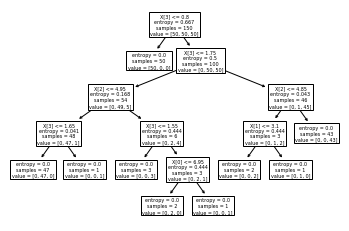

In [0]:
tree.plot_tree(clf)

https://scikit-learn.org/stable/modules/tree.html#tree-classification
* Use this to export tree using graphviz module

In [0]:
scores_dict = cross_validate(clf, X_train, Y_train, cv = 10)

In [0]:
scores_dict.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [0]:
print(scores_dict['test_score'],)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [0]:
# To print the score directly use the cross_val_score from sklearn
scores = cross_val_score(clf, X_train, Y_train, cv = 10)
print(scores)

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


## Decision tree-regression

In [0]:
from sklearn import tree

In [0]:
X = [[0,0], [2,2]]
Y = [0.5,2.5]

In [0]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,Y)

In [0]:
clf.predict([[1,1]])

array([0.5])

## Tips on using Decision Trees

* Decision trees tend to overfit on data with a large number of features. 
* Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
* Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.
* Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.
* Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.
* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.
* Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. 
* A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. 
* Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. 
* While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.
* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. * * * Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. 
* Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.
* If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.
* All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.
* If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. 
* Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

